In [24]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving used_cars_data.csv to used_cars_data (1).csv


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


##**🚗ML Project:Used Car Price Preduction **
Dataset:used_car_data.csv

1️⃣ Objective To build a Machine Learning model that predicts the selling price of a used car based on its features.

**2️⃣ Target Column Selection**

**🎯 Target Column: Price**

**Why Price?**

It is the value we want to predict It is numerical This makes the problem a Regression Problem

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [26]:
#to check shape of data
df.shape

(7253, 14)

In [27]:
# to check missing values
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [30]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [31]:
df.tail(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [32]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [34]:
df["Seats"].fillna(df["Seats"].median(), inplace=True)
df["Mileage"].fillna(df["Mileage"].mode()[0], inplace=True)
df["Engine"].fillna(df["Engine"].mode()[0], inplace=True)
df["Power"].fillna(df["Power"].mode()[0], inplace=True)


import warnings
warnings.filterwarnings('ignore')

/tmp/ipython-input-624905782.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Seats"].fillna(df["Seats"].median(), inplace=True)


In [52]:
df["Price"].fillna(df["Price"].mean(),inplace=True)
df["Power"].fillna(df["Power"].mean(),inplace=True)


In [53]:
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7253 non-null   object 
 9   Engine             7253 non-null   object 
 10  Power              7253 non-null   object 
 11  Seats              7253 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [48]:
col = ['Price']
df[col] = df[col].replace(0, np.nan)

In [49]:
df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [39]:
# Ensure columns are string type before applying string operations
df["Mileage"] = df["Mileage"].astype(str)
df["Engine"] = df["Engine"].astype(str)
df["Power"] = df["Power"].astype(str)

df["Mileage"] = df["Mileage"].str.replace(" kmpl","", regex=False).str.replace(" km/kg","", regex=False)
df["Engine"] = df["Engine"].str.replace(" CC","", regex=False)
df["Power"] = df["Power"].str.replace(" bhp","", regex=False)

# Convert to float, coercing any non-numeric values (like 'null' strings) to NaN
df[["Mileage","Engine","Power"]] = df[["Mileage","Engine","Power"]].apply(pd.to_numeric, errors='coerce')

In [41]:
#Encoding categorical column
le = LabelEncoder()

categorical_cols = ["Location", "Fuel_Type", "Transmission", "Owner_Type", "Name"]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [55]:
#feature and target sepration
x = df.drop("Price", axis=1)
y = df["Price"]


In [56]:
#train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [57]:
#import file

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
#linear regration
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [62]:
#predictiuon
y_pred_lr = lr.predict(x_test)

In [63]:
# model evaluation
print("Linear Regression Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Performance
MAE: 3.819136649458896
MSE: 51.399202618793744
RMSE: 7.1693237211604375
R2 Score: 0.4698338659384431


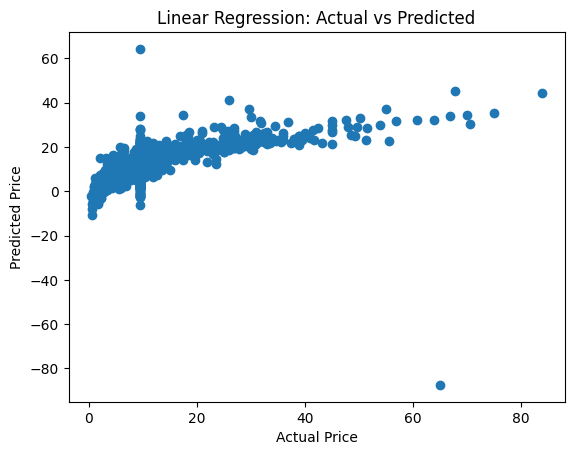

In [64]:

plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

In [65]:
#Polynomial Regresstion
#Train test split(Polynomial Data)

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(
    x_poly, y, test_size=0.2, random_state=42
)

In [66]:
#model training
lr_poly = LinearRegression()
lr_poly.fit(x_train_p, y_train_p)

LinearRegression()

In [67]:
#Predicion
y_pred_poly= lr_poly.predict(x_test_p)

In [68]:
#
print("Polynomial Regression Performance")
print("MAE:", mean_absolute_error(y_test_p, y_pred_poly))
print("MSE:", mean_squared_error(y_test_p, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test_p, y_pred_poly)))
print("R2 Score:", r2_score(y_test_p, y_pred_poly))

Polynomial Regression Performance
MAE: 3.762451631670159
MSE: 1639.5354541860781
RMSE: 40.49117748579409
R2 Score: -15.911277395670446


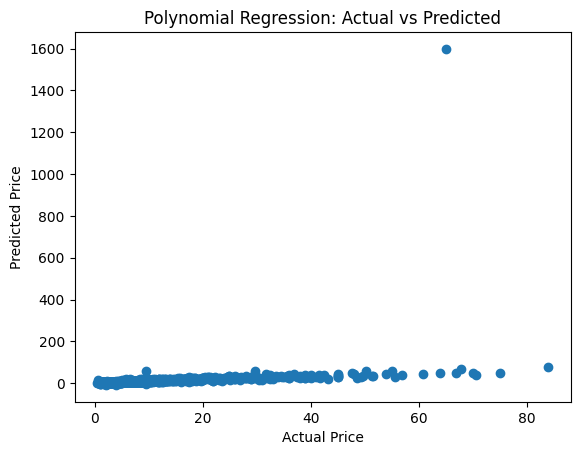

In [69]:
#
plt.scatter(y_test_p, y_pred_poly)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()

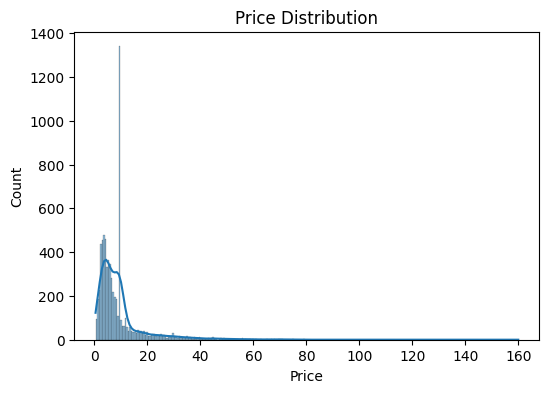

In [70]:
plt.figure(figsize=(6,4))
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()

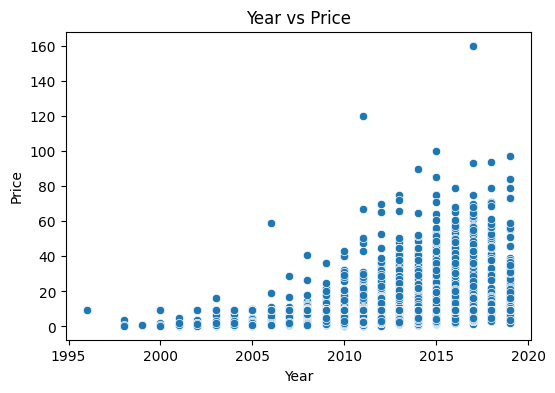

In [71]:
#year vs price
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Year"], y=df["Price"])
plt.title("Year vs Price")
plt.show()

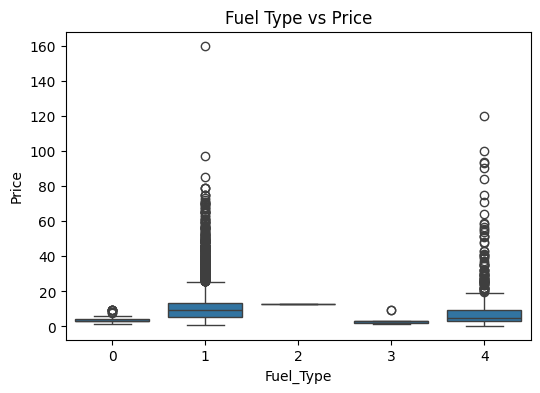

In [72]:
#fuel type vs price
plt.figure(figsize=(6,4))
sns.boxplot(x="Fuel_Type", y="Price", data=df)
plt.title("Fuel Type vs Price")
plt.show()

In [74]:
#model evaluation
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [97]:
print("Random Forest Regressor Performance")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Random Forest Regressor Performance
MAE: 1.2658809782117748
MSE: 7.974277018173735
RMSE: 2.8238762398826434
R2 Score: 0.9177479143010039


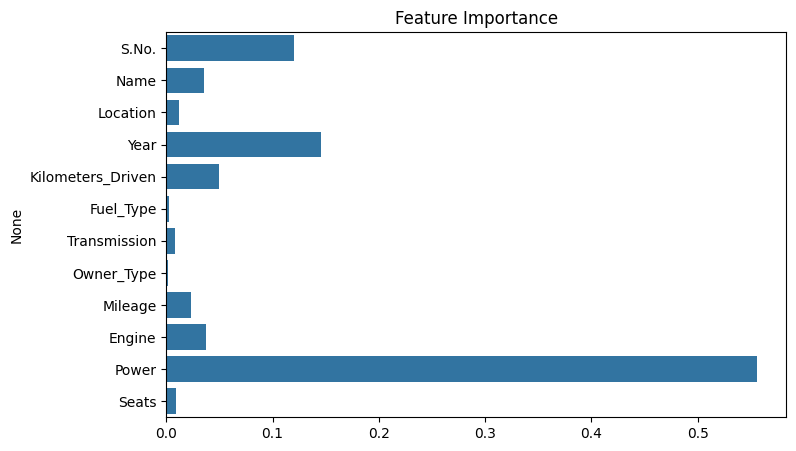

In [75]:
# feature import
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

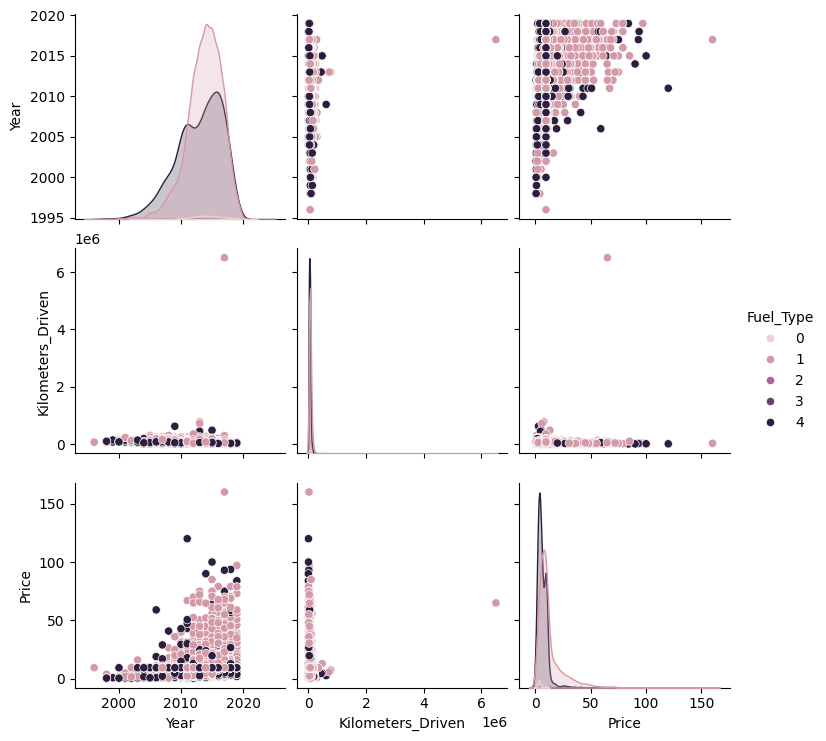

In [76]:
# pairplot (relationship between importance feature )
sns.pairplot(
    df[['Year', 'Kilometers_Driven', 'Price', 'Fuel_Type']],
    hue='Fuel_Type'
)

In [103]:
#3d visualization for "used car" or "browser" if needed
import plotly.express as px



fig = px.scatter_3d(
    df,
    x="Year",
    y="Kilometers_Driven",
    z="Price",
    color="Fuel_Type",
    title="3-D USED CAR PRICE VISUALIZATION",

)

fig.show()

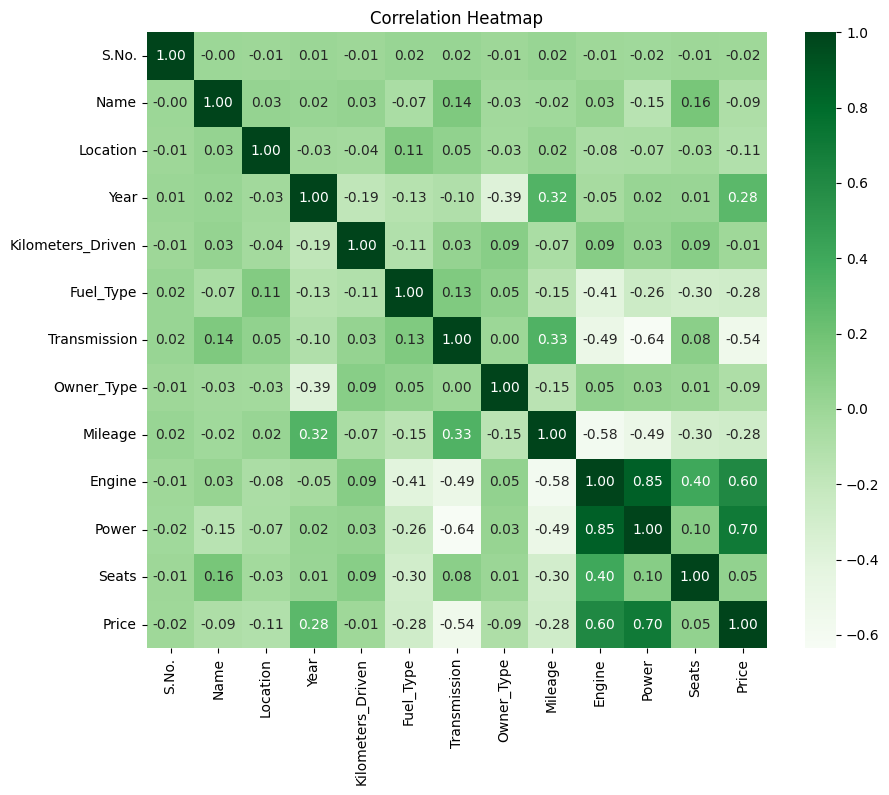

In [80]:
# heatmap
h_corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(h_corr,annot=True,cmap='Greens',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

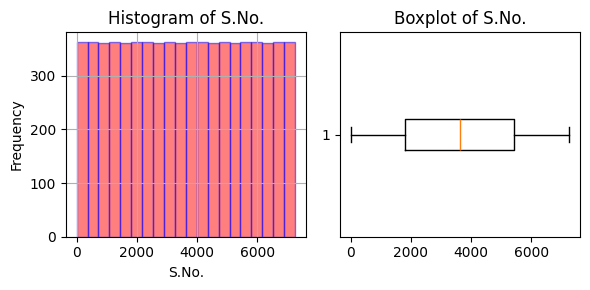

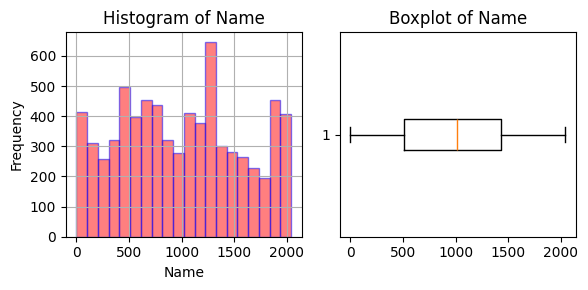

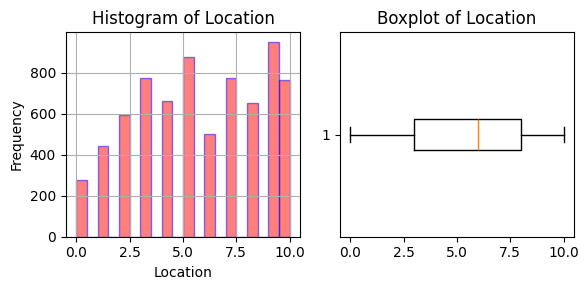

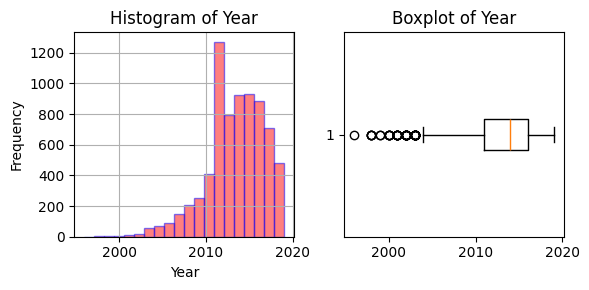

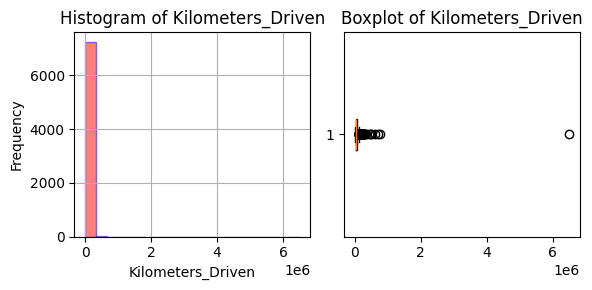

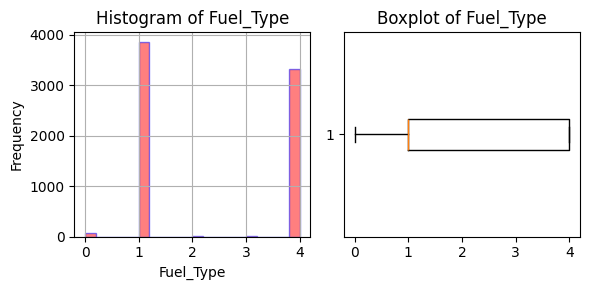

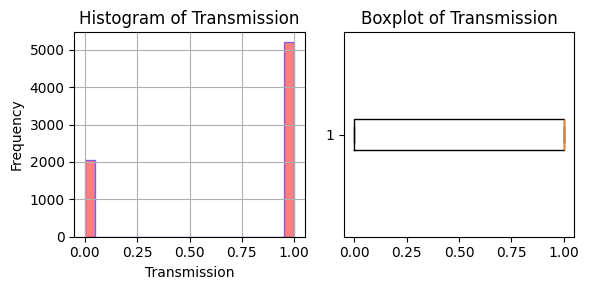

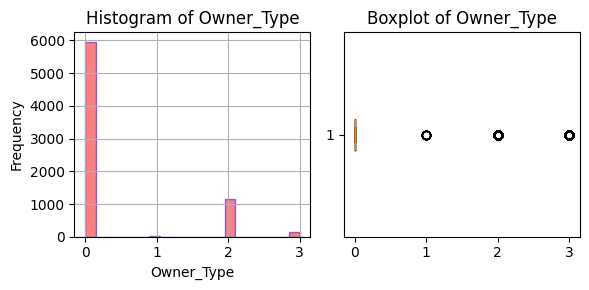

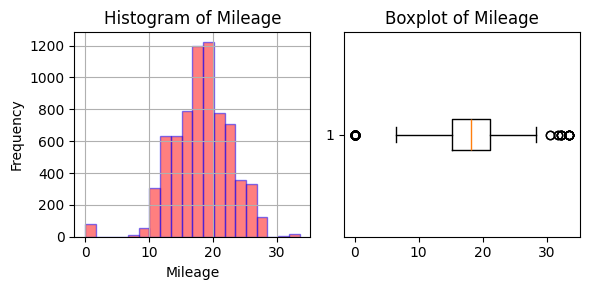

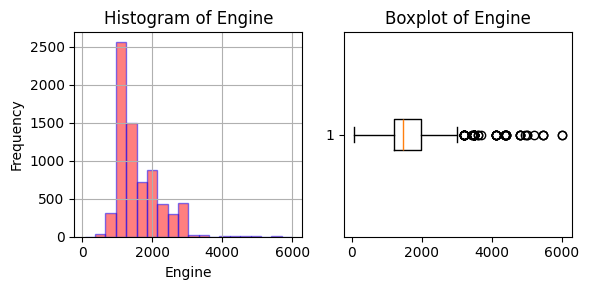

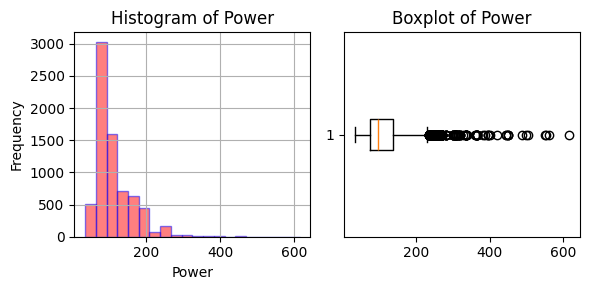

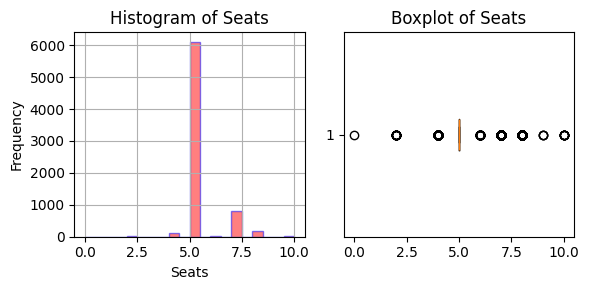

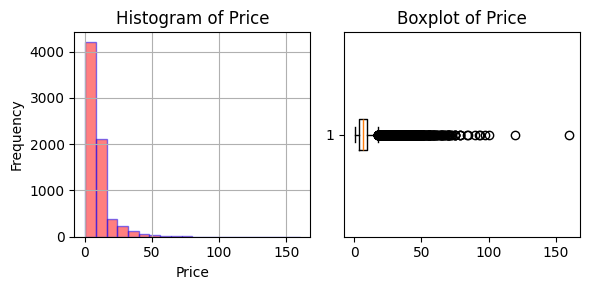

In [82]:
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for i in numeric_cols:
    plt.figure(figsize=(6,3))

    plt.subplot(1,2,1)
    df[i].hist(bins=20, alpha=0.5, color='red', edgecolor='blue')
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')

    plt.subplot(1,2,2)
    plt.boxplot(df[i], vert=False)
    plt.title(f'Boxplot of {i}')

    plt.tight_layout()
    plt.show()

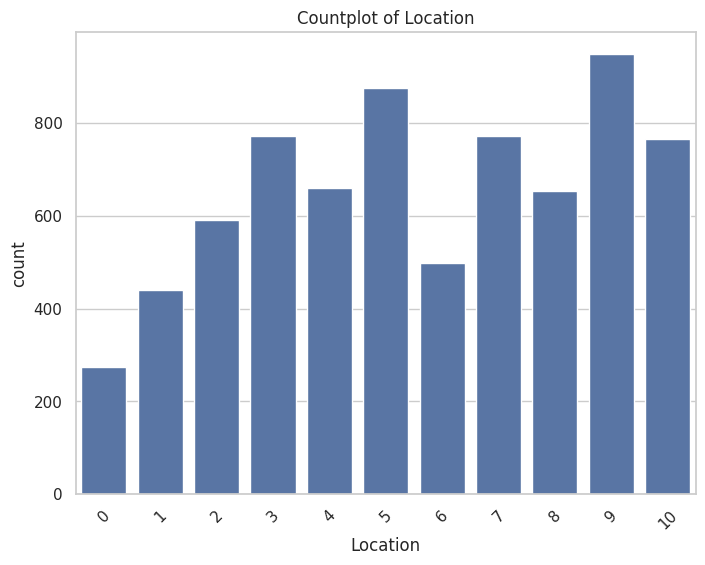

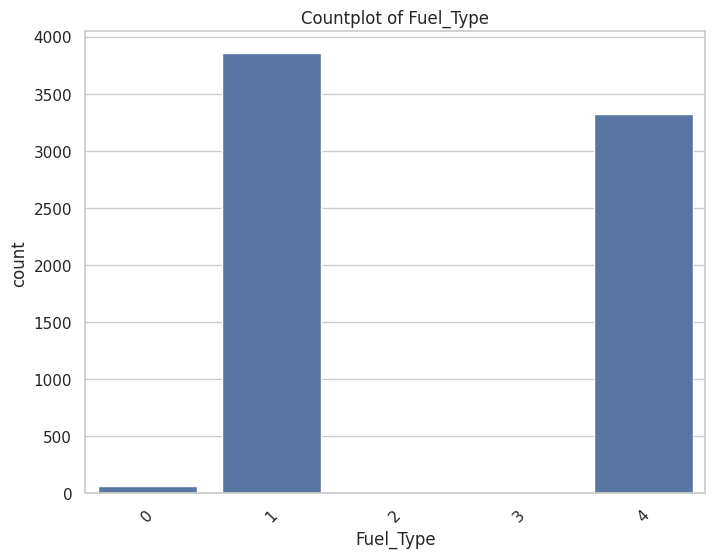

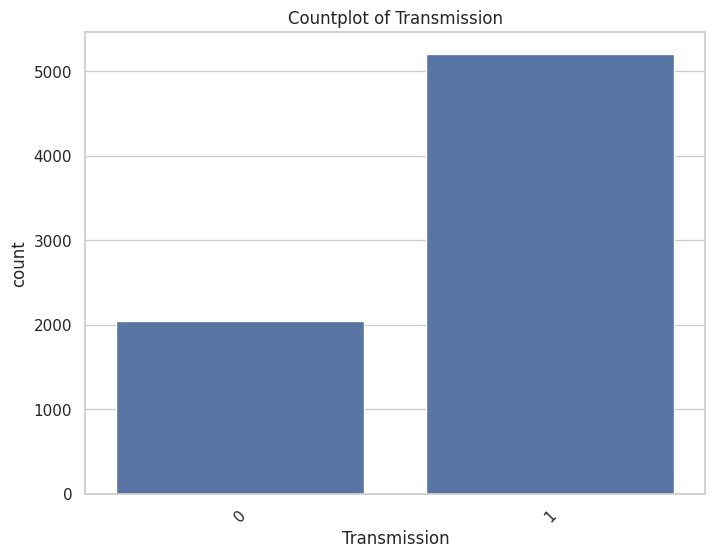

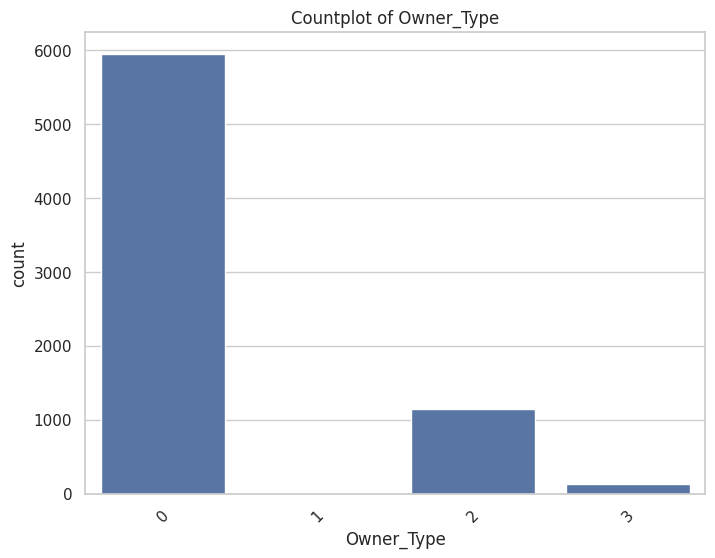

In [84]:
#set the style of the graph
sns.set(style='whitegrid')

# Define the categorical columns
categorical_cols = ["Location", "Fuel_Type", "Transmission", "Owner_Type"]
cat = df[categorical_cols]

#we will get the countplots of all the categorical features in the df
for i in cat.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(data=cat, x=i)
    plt.title(f'Countplot of {i}')
    plt.xticks(rotation=45)
    plt.show()

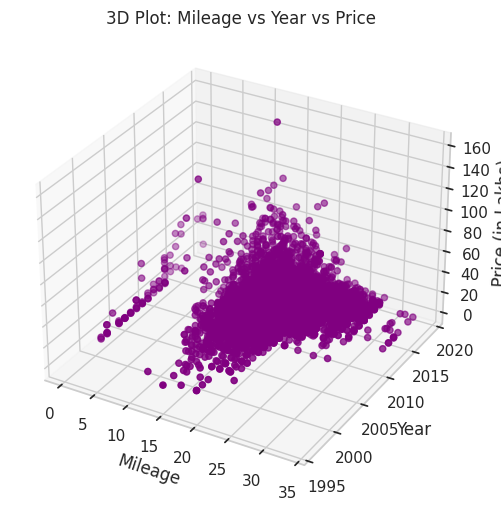

In [110]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df["Mileage"],
    df["Year"],
    df["Price"],
    c='purple'
)

ax.set_xlabel("Mileage")
ax.set_ylabel("Year")
ax.set_zlabel("Price (in Lakhs)")
ax.set_title("3D Plot: Mileage vs Year vs Price")

plt.show()

In [111]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy using R2 Score
r2 = r2_score(y_test, y_pred)

# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance:")
print("R2 Score (Accuracy):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Model Performance:
R2 Score (Accuracy): 0.9330227518245675
Mean Absolute Error (MAE): 1.0415246580757174
Mean Squared Error (MSE): 6.374137120590429
Root Mean Squared Error (RMSE): 2.524705353222516


In [112]:
# Accuracy using R2 Score
r2 = r2_score(y_test, y_pred)
print("R2 Score (Accuracy):", r2)

R2 Score (Accuracy): 0.9330227518245675


#**Conclusion:**
*The Price of used cars can be predicted effectively using ML

*Random Forest Regressor provides high accuracy

*Important features include Year, Power, Engine, Kilometers Driven